In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
inputfile = 'E:/学习/Boot Camp/Root Insurance/Root_Insurance_data.csv'
df = pd.read_csv(inputfile)

In [3]:
print(df.columns)
print(df.dtypes)
df.head()

Index(['Currently Insured', 'Number of Vehicles', 'Number of Drivers',
       'Marital Status', 'bid', 'rank', 'click', 'policies_sold'],
      dtype='object')
Currently Insured     object
Number of Vehicles     int64
Number of Drivers      int64
Marital Status        object
bid                    int64
rank                   int64
click                   bool
policies_sold          int64
dtype: object


,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold
0,unknown,2,1,M,10,2,False,0
1,Y,3,1,M,10,5,False,0
2,Y,3,2,M,10,5,False,0
3,N,3,2,S,10,4,False,0
4,unknown,2,2,S,10,2,False,0


In [4]:
dummies1=pd.get_dummies(df['Currently Insured'], prefix='Currently Insured' )
dummies2=pd.get_dummies(df['Marital Status'], prefix='Marital Status' )
df['click'] = np.where(df['click']==False,0,1)

In [5]:
dfnew=pd.concat([dummies1,dummies2,df],axis=1)
dfnew.drop(['Currently Insured','Marital Status'], axis=1, inplace=True)

In [218]:
X = dfnew[['Currently Insured_N','Currently Insured_Y','Number of Vehicles','Number of Drivers','Marital Status_M','Marital Status_S']]
y = dfnew['click']

In [219]:
## Now split the data
## Have 20% for testing
## Set 614 as the random state
## and stratify the split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=.2,
                                                shuffle=True,
                                                random_state=614,
                                                stratify=y)

In [220]:
log_reg = LogisticRegression()

In [221]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [222]:
log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

#the accuracy is high, so the model is reasonable enough.

Accuracy of logistic regression classifier on test set: 0.81


In [223]:
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [224]:
#There are 1817 pepole clicking among the 10,000 records, 
#so I think we should show the ads to those people who have a probability of 0.3 to click in our ads.
#When the sample size is large enough, we can consider the frequency of one event's occurence to be it's probability, 
#which means that a person have a probability of 18.17% to click in our ads.

#The threshold could be set as other reasonable values and I choose 0.3 here arbitrarily
y_pred=pd.DataFrame((log_reg.predict_proba(X)[:,1]),columns = ['click_prob'])

In [225]:
y_pred

,click_prob
0,0.287786
1,0.058232
2,0.066979
3,0.075128
4,0.363096
...,...
9995,0.194785
9996,0.213745
9997,0.069888
9998,0.189727


In [226]:
dfpred=pd.concat([dfnew,y_pred],axis=1)

In [227]:
data=dfpred.drop(index=dfpred.loc[(dfpred['click_prob']<=0.3)].index)

In [228]:
data.reset_index(drop=True, inplace=True)

#We gain a new dataset here. Records left nwo are people who have 30% probability to click in our ads, 
#and we will use this dataset to determine our bid strategy.
#Though some people do not click in actually, we still leave them in our new dataset, 
#because the reliable model we get "think" these people have 30% probability to click in, not 100%,
#and they still could be our potential customers.

In [229]:
data

,Currently Insured_N,Currently Insured_Y,Currently Insured_unknown,Marital Status_M,Marital Status_S,Number of Vehicles,Number of Drivers,bid,rank,click,policies_sold,click_prob
0,0,0,1,0,1,2,2,10,2,0,0,0.363096
1,0,0,1,1,0,1,2,10,1,0,0,0.447382
2,0,0,1,0,1,2,2,10,2,1,1,0.363096
3,0,0,1,1,0,1,2,10,1,1,1,0.447382
4,0,0,1,1,0,1,2,10,1,1,1,0.447382
...,...,...,...,...,...,...,...,...,...,...,...,...
2044,0,0,1,1,0,1,2,10,2,1,0,0.447382
2045,0,0,1,1,0,1,1,10,1,1,1,0.410829
2046,0,0,1,1,0,2,2,10,3,0,0,0.319325
2047,0,0,1,0,1,1,1,10,1,1,1,0.458691


In [230]:
X2 = data[['Currently Insured_N','Currently Insured_Y','Number of Vehicles','Number of Drivers','Marital Status_M','Marital Status_S']]
y2 = data['policies_sold']

In [231]:
log_reg.fit(X2,y2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [232]:
pred=pd.DataFrame((log_reg.predict_proba(X2)[:,1]),columns = ['sold_prob'])

In [233]:
pred

,sold_prob
0,0.127178
1,0.169989
2,0.127178
3,0.169989
4,0.169989
...,...
2044,0.169989
2045,0.204325
2046,0.104775
2047,0.242254


In [234]:
sold_pred=pd.concat([data, pred],axis=1)

In [235]:
sold_pred['sold_click_ratio']=sold_pred['sold_prob']/sold_pred['click_prob']

In [236]:
sold_pred

,Currently Insured_N,Currently Insured_Y,Currently Insured_unknown,Marital Status_M,Marital Status_S,Number of Vehicles,Number of Drivers,bid,rank,click,policies_sold,click_prob,sold_prob,sold_click_ratio
0,0,0,1,0,1,2,2,10,2,0,0,0.363096,0.127178,0.350260
1,0,0,1,1,0,1,2,10,1,0,0,0.447382,0.169989,0.379964
2,0,0,1,0,1,2,2,10,2,1,1,0.363096,0.127178,0.350260
3,0,0,1,1,0,1,2,10,1,1,1,0.447382,0.169989,0.379964
4,0,0,1,1,0,1,2,10,1,1,1,0.447382,0.169989,0.379964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,0,0,1,1,0,1,2,10,2,1,0,0.447382,0.169989,0.379964
2045,0,0,1,1,0,1,1,10,1,1,1,0.410829,0.204325,0.497348
2046,0,0,1,1,0,2,2,10,3,0,0,0.319325,0.104775,0.328114
2047,0,0,1,0,1,1,1,10,1,1,1,0.458691,0.242254,0.528142


In [237]:
X3 = data[['Currently Insured_N','Currently Insured_Y','Number of Vehicles','Number of Drivers','Marital Status_M','Marital Status_S']]
y3 = sold_pred['sold_click_ratio']

In [238]:
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,
                                                test_size=.2,
                                                shuffle=True,
                                                random_state=614,
                                                stratify=y3)

In [243]:
sold_pred.corr()

#From the correlation matrix, the correlation coefficient between numbers of driver and sold_click_ratio is -0.916166,
#which means a very strong correlationship between these two factors.
#The correlation coefficient between numbers of vehicles and sold_click_ratio is -0.502853,
#and we can think that the correlationship between these two factors is not bad.

,Currently Insured_N,Currently Insured_Y,Currently Insured_unknown,Marital Status_M,Marital Status_S,Number of Vehicles,Number of Drivers,bid,rank,click,policies_sold,click_prob,sold_prob,sold_click_ratio
Currently Insured_N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Currently Insured_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Currently Insured_unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status_M,NaN,NaN,NaN,1.000000,-1.000000,-0.153286,0.160285,NaN,-0.007653,-0.062905,-0.030215,-0.166594,-0.254451,-0.262677
Marital Status_S,NaN,NaN,NaN,-1.000000,1.000000,0.153286,-0.160285,NaN,0.007653,0.062905,0.030215,0.166594,0.254451,0.262677
Number of Vehicles,NaN,NaN,NaN,-0.153286,0.153286,1.000000,0.167227,NaN,0.015146,-0.048589,-0.101531,-0.910411,-0.850754,-0.502152
Number of Drivers,NaN,NaN,NaN,0.160285,-0.160285,0.167227,1.000000,NaN,0.008618,-0.038076,-0.064524,0.054326,-0.543524,-0.916215
bid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank,NaN,NaN,NaN,-0.007653,0.007653,0.015146,0.008618,NaN,1.000000,-0.311783,-0.152115,-0.010461,-0.015630,-0.012323
click,NaN,NaN,NaN,-0.062905,0.062905,-0.048589,-0.038076,NaN,-0.311783,1.000000,0.578519,0.061488,0.075662,0.062454


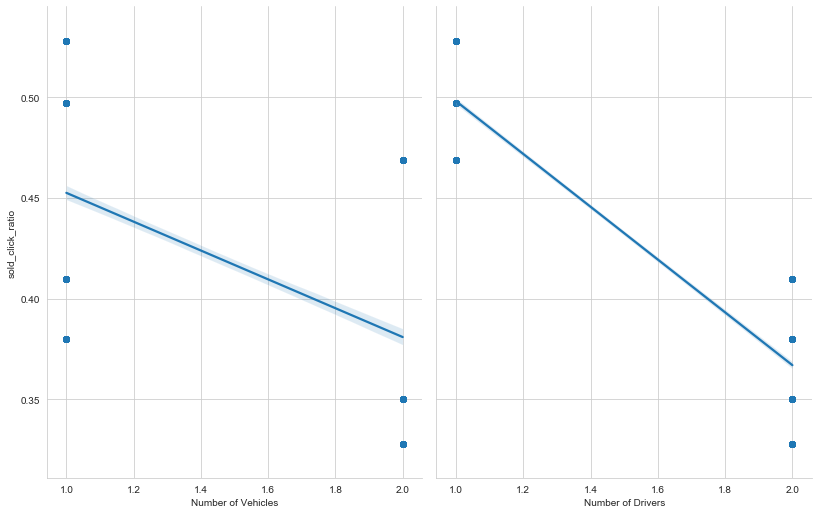

In [240]:
sns.pairplot(sold_pred,x_vars = ['Number of Vehicles','Number of Drivers'],y_vars = 'sold_click_ratio',height=7, aspect=0.8,kind = 'reg')
plt.show()

In [241]:
model = LinearRegression()
model.fit(X3_train,y3_train)
a  = model.intercept_
b = model.coef_

In [242]:
print(a)
print(b)

#'Currently Insured_N','Currently Insured_Y','Number of Vehicles','Number of Drivers','Marital Status_M','Marital Status_S'

#From the coefficients, we can see that decreasing the Number of Drivers will most obviously increases the sold/click ratio,
#so we can bid a higher price for 1-driver customer.
#People who have 1 car are more likely to buy the policy, so we can bid a higher price for those people.
#A single person is more likely to buy the policy than a married person.
#Currently insured status does not contribute to the sold/click ratio.

#In conclusion, we should bid the highest price for people with single+1 vehicle+1 driver,
#and lowest price for peopel with married+3 vehicles+2 drivers.

0.6857887080921008
[ 0.          0.         -0.05624136 -0.11718694 -0.01363997  0.01363997]


In [244]:
y3_pred = model.predict(X3_test)
from sklearn import metrics
MSE = metrics.mean_squared_error(y3_test, y3_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y3_test, y3_pred))

print('MSE:',MSE)
print('RMSE:',RMSE)

#RMSE of this model is very small, so the model fits quite well.

MSE: 3.360198042296096e-06
RMSE: 0.0018330842976513916


In [246]:
Vif = pd.DataFrame()
Vif[ "VIF Factor"] = [variance_inflation_factor(X3_train.values, i) for i in range(X3_train.shape[1])]
Vif["features"] = X3_train.columns

In [247]:
Vif

#All VIF's are less than 10, so we can say there is no multicollinearity problem in this model.

,VIF Factor,features
0,NaN,Currently Insured_N
1,NaN,Currently Insured_Y
2,1.065620,Number of Vehicles
3,1.068001,Number of Drivers
4,8.079752,Marital Status_M
5,9.942028,Marital Status_S
